<a href="https://colab.research.google.com/github/O-keita/linear_regression_model/blob/main/Summative/linear_regression/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from google.colab import drive, files
import joblib

# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
#matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor
# Decision tree from sklearn
from sklearn.tree import DecisionTreeRegressor
#mean squared error for sklearn
from sklearn.metrics import mean_squared_error
#train test split from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV


## Mount Google Drive



In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Import the Data from Drive and Load CSV

In [4]:
df = pd.read_csv('/content/drive/My Drive/Student_Performance.csv')

print(tabulate(df.head(5), headers='keys', tablefmt='pretty', showindex=False))
print(df.isna().sum())
print(df.info())

+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
| Hours Studied | Previous Scores | Extracurricular Activities | Sleep Hours | Sample Question Papers Practiced | Performance Index |
+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
|       7       |       99        |            Yes             |      9      |                1                 |       91.0        |
|       4       |       82        |             No             |      4      |                2                 |       65.0        |
|       8       |       51        |            Yes             |      7      |                2                 |       45.0        |
|       5       |       52        |            Yes             |      5      |                2                 |       36.0        |
|       7       |       75        |             No            

# Finding the min and max of each data colum

In [5]:
print(f"The minimum study hours: {df['Hours Studied'].min()}")
print(f"The Previous Score: {df['Previous Scores'].min()}")
print(f"The Sleep hours: {df['Sleep Hours'].min()}")
print(f"Minimum Sample Questions Practiced {df['Sample Question Papers Practiced'].min()}")
print("==================================================================")
print(f"The Maximum study hours: {df['Hours Studied'].max()}")
print(f"The Maximum Previous Score: {df['Previous Scores'].max()}")
print(f"The Maximum Sleep hours: {df['Sleep Hours'].max()}")
print(f"The Maximum Sample Questions Practiced {df['Sample Question Papers Practiced'].max()}")


The minimum study hours: 1
The Previous Score: 40
The Sleep hours: 4
Minimum Sample Questions Practiced 0
The Maximum study hours: 9
The Maximum Previous Score: 99
The Maximum Sleep hours: 9
The Maximum Sample Questions Practiced 9


## We convert the ***Extracurricular Activities*** into categorical, then convert them to 0 and 1 - for True and False

In [6]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({"Yes":1, "No":0})
print(tabulate(df.head(5), headers='keys', tablefmt='pretty', showindex=False))
print(df.info())

+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
| Hours Studied | Previous Scores | Extracurricular Activities | Sleep Hours | Sample Question Papers Practiced | Performance Index |
+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
|      7.0      |      99.0       |            1.0             |     9.0     |               1.0                |       91.0        |
|      4.0      |      82.0       |            0.0             |     4.0     |               2.0                |       65.0        |
|      8.0      |      51.0       |            1.0             |     7.0     |               2.0                |       45.0        |
|      5.0      |      52.0       |            1.0             |     5.0     |               2.0                |       36.0        |
|      7.0      |      75.0       |            0.0            

<ipython-input-6-a3f571889651>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({"Yes":1, "No":0})


# Heatmap to see the correlation of each data point ot the scores


The **heatmap** below illustrates how each feature contributes to or correlates with the target variable, Performance Index:

- **Previous Scores** has the highest correlation value of **0.92**, indicating that prior academic performance is the strongest predictor of future performance. The positive correlation suggests that higher previous scores generally lead to higher performance indices.

- **Hours Studied** follows with a correlation of **0.37**, showing that increased study hours are associated with improved academic outcomes, though not as strongly as previous scores.

- **Extracurricular Activities** has the lowest correlation value of **0.02**. While its direct impact on the performance index is minimal, it still plays a role in a student's overall academic experience and well-being.



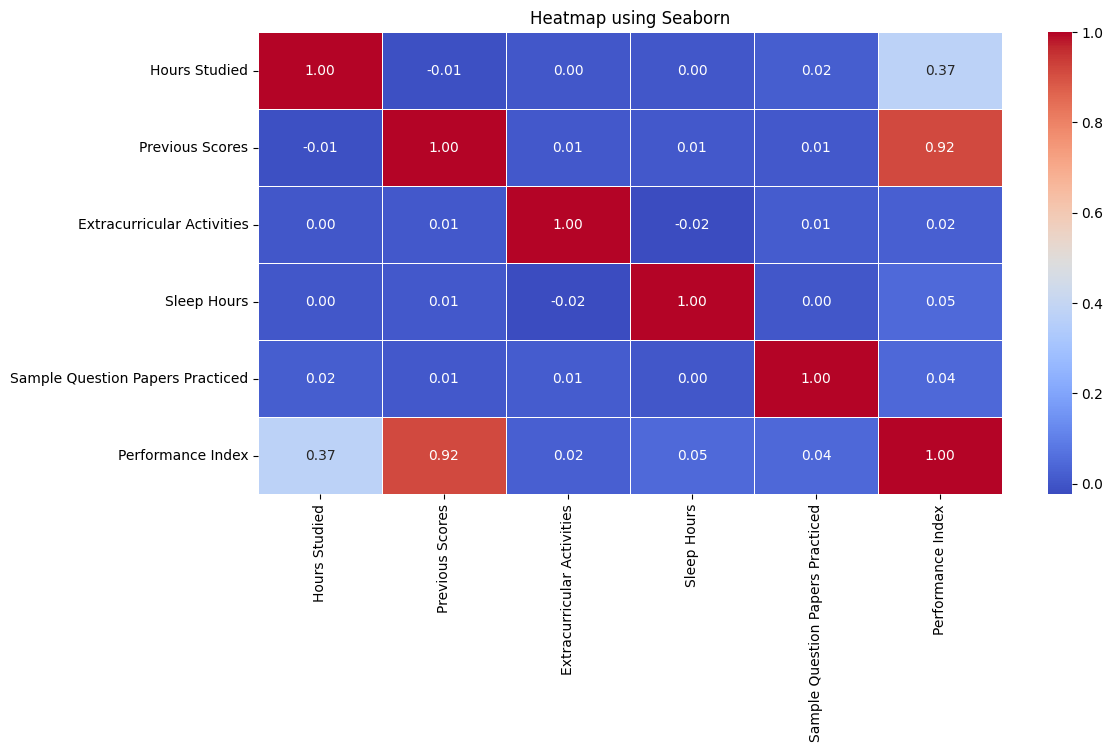

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap using Seaborn')
plt.show()

# Boxplot to show the distribution of our data

The boxplot below shows the graphical distribution of our student dataset, which helps us not only know the distribution of the dataset but also identify outliers that might hinder our predictions. As you can see, our data does not have any outliers, which would be points below the 25th percentile or above the 95th percentile. In the boxplot, we observe:

- Our highest **Hours Studied** is 9, indicating that the highest amount of time a student spends studying is 9 hours.

- The highest **previous score** is 99, showing that the best score a student has achieved is 99.

- The highest **sleep hours** is 9, which suggests that the maximum amount of sleep a student gets is 9 hours.

- The highest **sample questions practiced** is 10, indicating that the highest number of sample questions practiced by a student is 10.

On the other hand:

- The minimum **study hours** is 1, meaning the least amount of time spent on studying is 1 hour.

- The minimum **previous score** is 40, suggesting that the lowest score recorded by a student is 40.

- The minimum **sleep hours** is 4, meaning the least amount of sleep a student gets is 4 hours.

- The minimum **sample questions practiced** is 0, indicating that there are students who have not practiced any sample questions.

These values help us understand the overall spread and variability in the dataset, and knowing that there are no extreme outliers provides confidence in the integrity of the data.

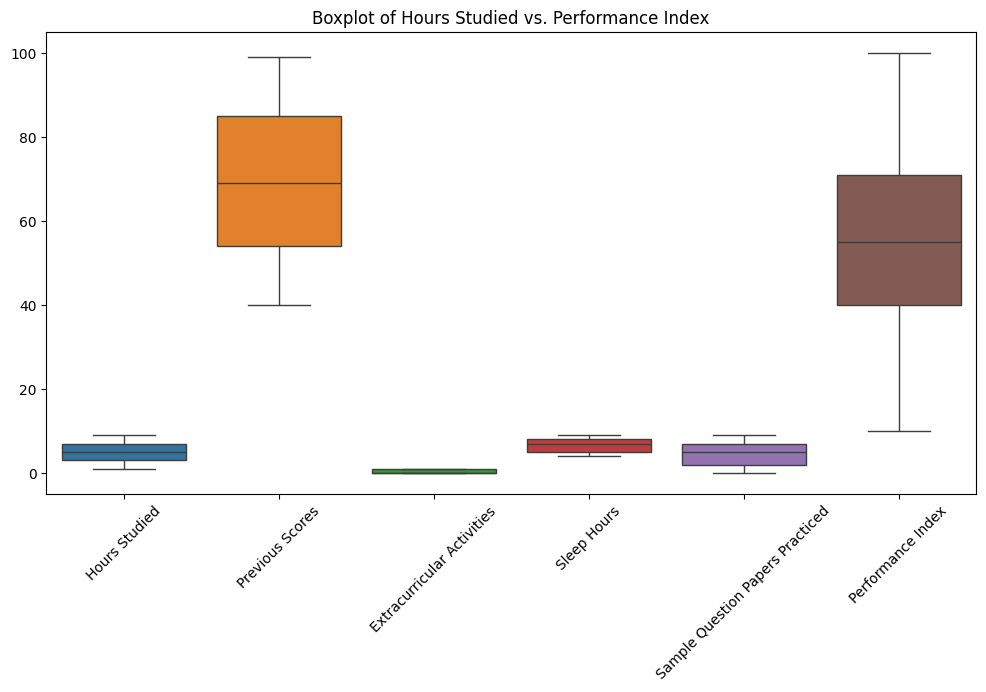

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

plt.title("Boxplot of Hours Studied vs. Performance Index")
plt.xticks(rotation=45)
plt.show()

## Features Selection


In [82]:
#Our features
# these are the columns that will help in predicting the Performance Index
X = df.drop(columns=['Performance Index'])

#Our Target
y = df['Performance Index']

X.to_numpy()
y.to_numpy()



#spliting our data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making Our first Predcition

In [83]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)


y_pred = lr_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))

rmse_test = np.sqrt(mean_squared_error(y_pred, y_test))

print(f"Root Mean Squared Error for train: {rmse_train}")
print(f"Root Mean Squared Error for test: {rmse_test}")



Root Mean Squared Error for train: 2.0419931071198567
Root Mean Squared Error for test: 2.0205515085050054


from our prediction above with Linear Regression, seem better with rmse(Root Mean Squared Error) of 2.02, but can can see how best to improve the this through, using different models like decision trees, and random forest and  comparing the models, then choose the one with the best output

# Visualization of Final Linear Regression Model that fits the data for training

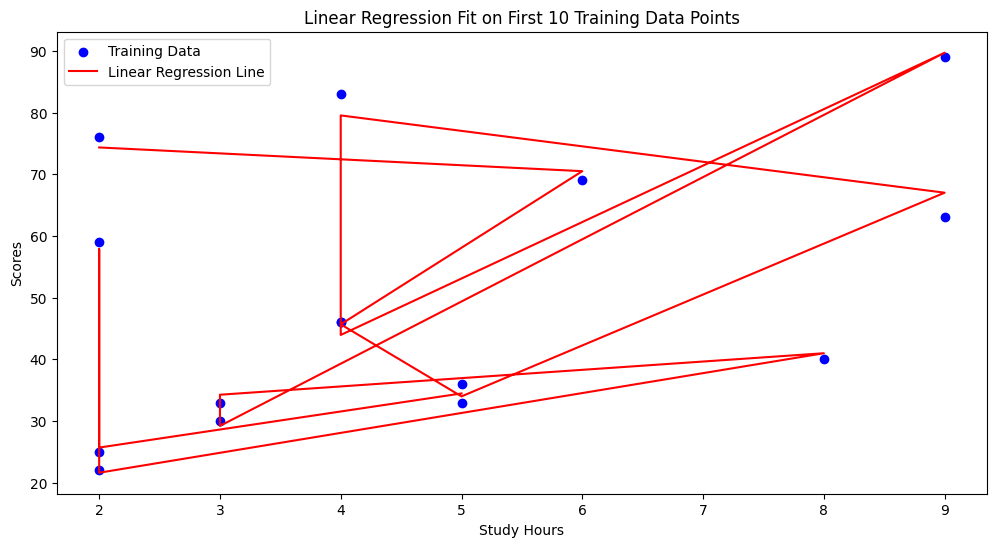

In [101]:
plt.figure(figsize=(12, 6))
X_train_subset = X_train.iloc[:15, :]
y_train_subset = y_train[:15]

y_train_pred_subset = lr_model.predict(X_train_subset)

plt.scatter(X_train_subset.iloc[:, 0], y_train_subset, color='blue', label='Training Data')

# Plot the linear regression line for the subset
plt.plot(X_train_subset.iloc[:, 0], y_train_pred_subset, color='red', label='Linear Regression Line')

plt.xlabel('Study Hours')  # X-axis label
plt.ylabel('Scores')  # Y-axis label
plt.title('Linear Regression Fit on First 10 Training Data Points')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Visualization of Final Linear Regression Model that fits the data for testing

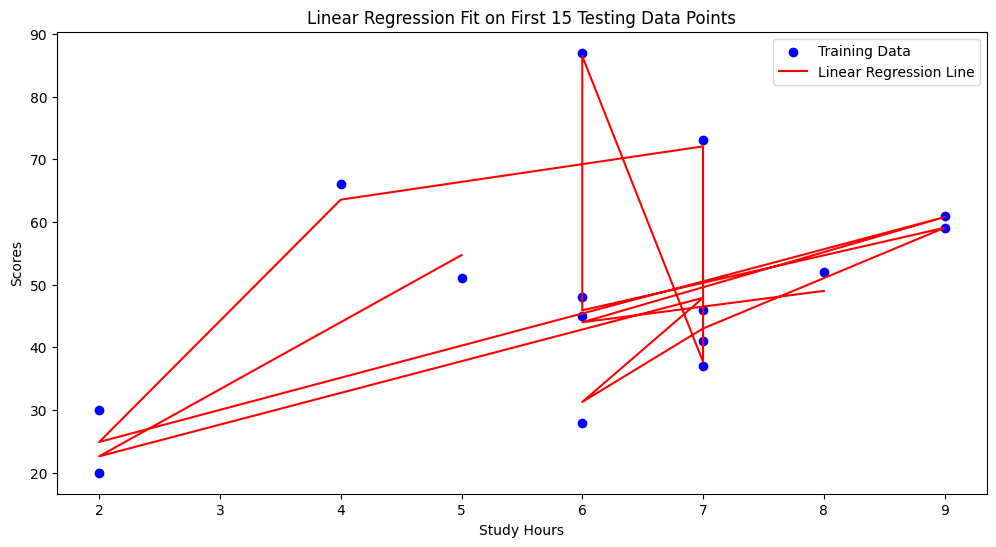

In [103]:
plt.figure(figsize=(12, 6))
X_test_subset = X_test.iloc[:15, :]
y_test_subset = y_test[:15]

y_test_pred_subset = lr_model.predict(X_test_subset)

plt.scatter(X_test_subset.iloc[:, 0], y_test_subset, color='blue', label='Training Data')

# Plot the linear regression line for the subset
plt.plot(X_test_subset.iloc[:, 0], y_test_pred_subset, color='red', label='Linear Regression Line')

plt.xlabel('Study Hours')  # X-axis label
plt.ylabel('Scores')  # Y-axis label
plt.title('Linear Regression Fit on First 15 Testing Data Points')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Training our models and making prediction

In [88]:
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,

}


model_scores ={
    "Linear Regression":rmse_test,
}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  Y_pred = model.predict(X_test)

  model_scores[model_name] = np.sqrt(mean_squared_error(Y_pred, y_test))


#soting our model from the best to the least model
model_sorted = sorted(model_scores.items(), key=lambda x:x[1])


best_model = None


best_model_name, best_rmse = model_sorted[0]
if best_model_name == "Linear Regression":
    best_model = lr_model
    joblib.dump(lr_model, 'best_model.pkl')
elif best_model_name == "Decision Tree":
    best_model = dt_model
    joblib.dump(dt_model, 'best_model.pkl')
else:
    best_model = rf_model
    joblib.dump(rf_model, 'best_model.pkl')





print(model_sorted)



[('Linear Regression', np.float64(2.0205515085050054)), ('Random Forest', np.float64(2.271307554426923)), ('Decision Tree', np.float64(2.968618271931311))]


# Predicting One data from the test

In [89]:

one_point = X_test.iloc[0].values.reshape(1, -1)

#selecting the first entry in the test
print(one_point)

#predict, lets predict and see
one_point_prediction = best_model.predict(one_point)

print(f"The Actual Score: {y_test.iloc[0]}")
print(f"The Predicted Score: {one_point_prediction}")


[[ 5 69  0  8  2]]
The Actual Score: 51.0
The Predicted Score: [54.71185392]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Download best Model

In [41]:
print(best_model)
files.download("best_model.pkl")

LinearRegression()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>